# Trabalho Final

Neste trabalho final você irá pôr em prática todas as etapas exercitadas ao longo da mentoria sobre projetos de aprendizado de máquina em uma tarefa de classificação de NLP: detecção de sarcasmo. Segundo Yaghoobian et al:

    “Sarcasm detection is the task of identifying irony containing utterances in sentiment-bearing text. However, the figurative and creative nature of sarcasm poses a great challenge for affective computing systems performing sentiment analysis.”

 

Detecção de sarcasmo é uma tarefa com muitas aplicações práticas interessantes,  mas também é extremamente desafiadora. Padrões linguísticos e sociais que categorizam o sarcasmo podem não estar contido unicamente no texto ou no uso de palavras específicas, dificultando que algoritmos de aprendizado de máquina aprendam a generalizar. Nesse contexto, foi proposto por Khodak et al o dataset SARC, coletado da plataforma Reddit:


    “We introduce the Self-Annotated Reddit Corpus (SARC), a large corpus for sarcasm research and for training and evaluating systems for sarcasm detection. The corpus has 1.3 million sarcastic statements -- 10 times more than any previous dataset -- and many times more instances of non-sarcastic statements, allowing for learning in both balanced and unbalanced label regimes. Each statement is furthermore self-annotated -- sarcasm is labeled by the author, not an independent annotator -- and provided with user, topic, and conversation context.”


Em anexo, encontra-se uma amostra do SARC. Dado esse contexto, você deverá criar e validar um modelo de detecção de sarcasmo utilizando esse dataset. O trabalho deverá conter:


    Análise exploratória

        Mostre exemplos de cada classe.

        Crie pelo menos 5 gráficos, contendo um que mostre o balanceamento entre as classes. Sugestões de outros gráficos: termos mais frequentes em cada classe, distribuição da quantidade de palavras em cada classe.

        Discuta seus achados.


    Aprendizado não-supervisionado

        Qualquer técnica pode ser utilizada, clusterização ou redução de dimensionalidade. Pode-se usar parte da análise exploratória ou como auxiliar na classificação.


    Limpeza e pré-processamento dos dados

        Pelo menos 3 técnicas de pré-processamento de texto (que já não sejam utilizadas por padrão na vetorização)

        Utilize alguma técnica de balanceamento de dados


    Engenharia de atributos

        Selecione dentre os dados disponíveis quais devem ser utilizados como atributos de entrada e o método para representação vetorial.

        Utilize pelo menos dois conjuntos de atributos de entrada, comparando as performances. Justifique suas escolhas.


    Estabelecimento de um baseline

        Utilize um modelo simples, não faça otimização de hiperparâmetros. Justifique sua escolha.


    Seleção e avaliação de modelos

        Escolha uma ou mais métricas de desempenho apropriadas para esta tarefa.

        Utilize pelo menos 4 algoritmos, realizando a otimização de hiperparâmetros. Destes modelos, ao menos um deve ser um algoritmos deve ser um que não foi visto durante a mentoria. Estude o funcionamento dele. Sugestão: modelo de Deep Learning.

        Avalie os algoritmos com hiperparâmetros otimizados no conjunto de teste.


    Análise de resultados

        Mostre exemplos dos erros (falso positivos e falso negativos) para o melhor dos algoritmos experimentados.

        Discuta os resultados e aponte quais seriam possíveis melhorias


    (OPCIONAL) Interpretabilidade

        Utilize algum método que permita uma interpretação das predições de algum dos seus modelos.


    (OPCIONAL) Deploy

        Implemente uma API para que o seu melhor modelo possa ser utilizado via requisições HTTP.

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
%matplotlib inline

Primeiramente, alterando as configurações do dataframe para que ele exiba os textos completos, e logo em seguida imprimindo o dataframe para realizar sua análise.

In [41]:
pd.set_option("display.max_colwidth", None)
df = pd.read_csv('sarc_sample.csv')
df

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,1,"Of course, just like 3.2 was the true Messiah.",ReticentHedgehog,ffxiv,1,1,0,2016-05,2016-05-02 20:20:37,"Is patch 3.3 going to be our savior? Without trying to sound like a broken record and repeating the many point of views of the growing apocalyptic threads on this forum. I was hoping to get the opinions of everyone if they believe patch 3.3 is going to bring back some of the players who have quit in the last patch or two, or does this feel like another cookie cutter patch that wont stop exit of quality population specifically on the North American servers. I ask this in concern that I have made a assertive effort as of late to refill our FC, and one of the strong points of the patch info so far is that they are installing a cross realm raid tool, which seems like it would diminish the need to recruit for a FC. I personally enjoy the aspect of a 10-15 member FC which can grow close and share things in common to the game and outside the game. But with the game seemingly losing subs it has become harder to find people to come together like I had just described and I don't want to put false hope in those who I have recruited so far. Give me some hope!"
1,1,"Yeah because Iran was 100% muslim prior to 1979, and still is now.",methmobile,worldnews,-3,-1,-1,2016-12,2016-12-30 10:21:31,I suggest you research Iran pre-1979 as well as al-Qatb and the rise of Wahhabism. You are fully entitled to have an opinion and express it (and you do bring up a good point re: rural cobservatism) but you are misinformed.
2,1,WELL YOU'RE JUST A BITCH...YOU HAVE TO GO AND POST AND TAKE YOUR DOWNVOTES,dillydelly,nba,1,1,0,2014-05,2014-05-04 08:02:30,"Warriors / Clips game threads literally add zero value to the game experience. Why would I want to see the words flop, flopped and flopper repeated constantly? Thunder / Clips game threads were pretty good during the season. We'll see how the playoff ones are."
3,1,"Yeah, it's dumb to run background checks on potential teachers.",Krenolds,AskReddit,1,1,0,2014-09,2014-09-02 08:09:10,"Oh i forgot.., you get to be finger printed when you are hired! Awesome!"
4,1,"Oh, it's not that bad once you get a handle on the crippling depression and constant tooth grinding.",ericanderton,AskReddit,4,4,0,2011-08,2011-08-24 13:17:20,Haha oh. Definitely not an option than.
...,...,...,...,...,...,...,...,...,...,...
59995,0,"room you mean like, dimension?",Tikikala,digimon,1,1,0,2016-03,2016-03-26 03:42:22,"So as another guy pointed out. Huckmon might be projecting Ken as a way to steal Meicoomon, remember he was lurking all the time. Also he was in the 'room' after Ken disappeared"
59996,0,I wasn't too fond of grabner in 14 so I put Bergeron up the middle to win draws and set up plays and what not.,mrhairybolo,hockey,1,1,0,2014-08,2014-08-10 05:57:31,Hall - Duchene - Grabner?
59997,0,he wasn't even at worlds in season 4!,Highstalker,leagueoflegends,-1,-1,0,2016-09,2016-09-19 14:41:23,Yeah he was.
59998,0,"Right, but the Trump sign...",gcbeehler5,pics,2,2,0,2016-09,2016-09-01 02:14:54,I wouldn't say you have to be liberal to appreciate sustainability. You just have to not be an ignorant twat.


# Análise exploratória

Esta etapa visa analisar o conjunto de dados para entender melhor seu desempenho e os seus futuros resultados. Para isso, iremos analisar alguns gráficos que trazem informações importantes para a classificação dos dados. Primeiramente, trouxe a baixo 4 exemplos de cada classe, conforme orientado na descrição da atividade.

In [42]:
um = df['label'] == 1
df[um].sample(n = 4)

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
1484,1,The people who don't realize reading books isn't a hobby.,Kinno,rant,1,1,0,2015-10,2015-10-02 13:11:58,Which people tell you this?
8692,1,Nah man yall were clearly the instigators in Philly,DicsoDisco,hockey,3,3,0,2016-04,2016-04-20 06:54:37,"Yep, can speak from very recent experience"
1850,1,Forgot the,Narnn,videos,1,1,0,2016-09,2016-09-19 16:33:04,"You men should all now realize, don't speak unless spoken to."
30880,1,Thank you for sharing this extremely useful bit of information relating to the sub.,CalmConquistador,vita,0,0,0,2015-05,2015-05-27 17:06:44,"Before I looked at the Sub this was from, my first thought was, ""They're really getting weird with their beer names"". Also, for those of you who don't get it...there's a brewery in Marshall, Michigan called Dark Horse. It's very popular. And craft brews seem to be all about funny/weird names these days."


In [43]:
zero = df['label'] == 0
df[zero].sample(n = 4)

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
52179,0,Heard him coming from a mile away.,vteckickedin,funny,1,1,0,2012-08,2012-08-16 21:10:32,I hear that!
47318,0,Talib,LongtimeLurkersacc,MaddenUltimateTeam,1,1,0,2016-06,2016-06-10 19:40:22,"Sounds good, will make the move, i have about 500k to work with who should i put in the slot to take up the slack of moving NTL"
44021,0,"Now, *that's* a wedding dress!",PoliteSarcasticThing,pantsu,6,6,0,2014-03,2014-03-14 05:53:09,The not so blushing bride
57328,0,"French politicians have obviously solved all major issues, now that they are squeezing their brains to design policy for soda refills.",Classical_Liberale,Libertarian,2,2,0,2015-04,2015-04-06 07:41:50,France just banned free refills of sugary drinks in fast food restaurants


### Etapas de pré-processamento

Para realizar a coleta de informações que seriam utilizadas nos gráficos, foi necessário antecipar a etapa de pré-processamento dos dados, as funções a baixo tem o objetivo de remover alguns tipos de caracteres que não são utéis durante a análise dos dados.

1. Primeiramente a função "remover_pontuação" faz uso de list comprehension para iterar entre os caracteres do texto e remover os caracteres que estão incluidos em "string.punctuation".

In [44]:
import string
def remover_pontuacao(text):
    sem_pontuacao="".join([i for i in text if i not in string.punctuation])
    return sem_pontuacao

2. A função "lower" tem o objetivo de deixar todas as palavras do texto em minúsculo, criando um padrão mais fácil de detectar nos caracteres. Esse passo é muito importante para realizar a remoção de stopwords, pois todas as palavras na lista de stopwords estão em letra minúscula.

In [45]:
def lower(text):
    return text.lower()

3. A função "remove_nums" utiliza regex para detectar e remover todos os números do conjunto de dados, isso é importante pois em geral caracteres numéricos não trazem muita informação, e ao retirá-los é possível diminuir bastante a quantidade de dimensões do conjunto.

In [46]:
import re
def remove_nums(text):
    num_regex = '\d+'
    t = re.sub(num_regex, '', text)
    return t

4. A função "remove_stop_words" serve para remover as stopwords do conjunto de dados. Igualmente aos caracteres númericos as stopwords não agregam muitas informações durante a análise, por isso, geralmente é benéfico fazer sua retirada, principalmente pois elas costumam se repetir muitas vezes durante os textos, assim, aumentando a quantidade de dimensões.

In [47]:
import nltk
def remove_stop_words(text):
    stopwords = nltk.corpus.stopwords.words('english')
    texto = [w for w in text.split() if w not in stopwords]
    frase = " ".join(texto)
    return frase

5. A função "lemmatizer" tem o proposito de transformar as palavras do conjunto de dados em suas formas base, com o cuidado para que elas não percam o sentido. Esse passo é importante para simplificar o texto, ajudando a extrair o máximo de informação.

In [48]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatizer(text):
    texto = [wordnet_lemmatizer.lemmatize(word) for word in text.split()]
    frase = " ".join(texto)
    return frase

6. A função "remove_little_words" remove do conjunto de dados as palavras que possuem apenas 2 ou menos caracteres, pois essas palavras curtas aumentam consideravelmente a quantidade de dimensões do conjunto e, em geral, não trazem muitas informações, além de que na maioria das vezes se tratam de erros de digitação.

In [49]:
def remove_little_words(text):
    frase =" ".join([w for w in text.split() if len(w) > 2])
    return frase

7. A função "preprocess" é responsável por executar algumas das funções acima, facilitando o uso destas em conjunto. Na função preprocess, a ordem em que as funções são chamadas é muito importante, pois a lista de stopwords utilizada possui apenas palavras em minúsculo e com o uso correto das pontuações, logo, se retirarmos as  pontuações antes das stopwords, algumas palavras podem acabar escapando.

In [50]:
def preprocess(text):
        text = remove_nums(text)
        text = lower(text)
        text = remove_stop_words(text)
        text = remover_pontuacao(text)
        text = lemmatizer(text)
        text = remove_little_words(text)
        return text

## Gráficos

### 1° Gráfico

Primeiramente temos o gráfico da quantidade de itens de cada classe. É possível reparar que existem muito mais itens na classe "1" do que na classe "0", isso significa que esse é um conjunto de dados desbalanceado, e futuramente precisaremos utilizar algumas tecnicas para realizar o seu balanceamento, pois em casos de classificação o resultado do modelo pode acabar sendo enviesado, ou seja, ele tenderá a classificar todos os dados na classe que possui mais exemplos

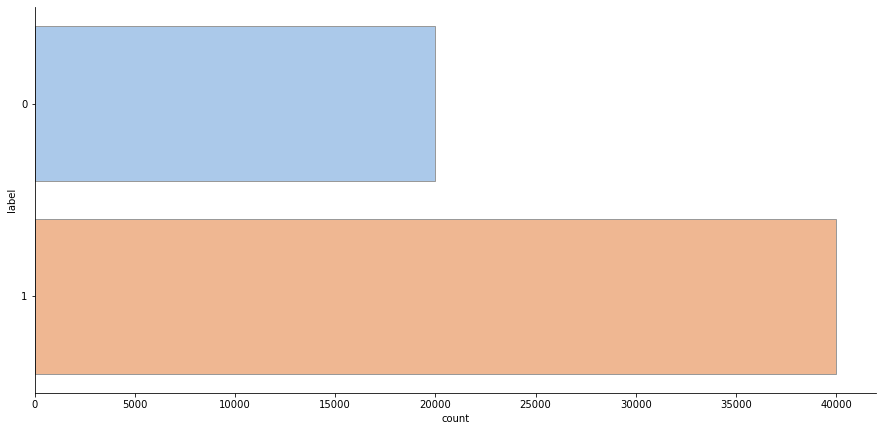

In [51]:
# Gráfico do balanceamento entre as classes
sns.catplot(y="label", kind="count",
            palette="pastel", edgecolor=".6",
            data=df)
plt.gcf().set_size_inches(13, 6)

### 2° Gráfico

O segundo gráfico mostra as 10 palavras que mais se repetiram nos comentários classificados na classe "1", que seriam os comentários sarcásticos.

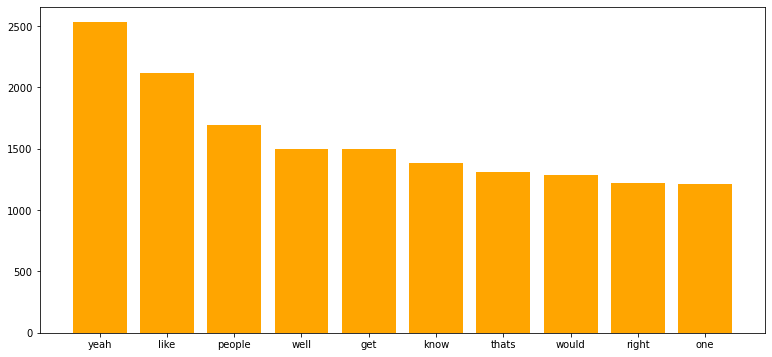

In [52]:
# Gráfico das palavras que aparecem com mais frequência na classe 1
from nltk import word_tokenize
from nltk import FreqDist
from matplotlib.pyplot import figure
q = df[um]
q = q.comment.explode().to_frame().reset_index(drop=True)
P=' '.join([str(w) for w in q['comment']])
P = preprocess(P)
P = FreqDist(word_tokenize(P))

figure(figsize=(13, 6))
x, y = zip(*P.most_common(n=10))
plt.bar(range(len(x)), y, color='orange')
plt.xticks(range(len(x)), x)
plt.show()

### 3° Gráfico

No terceiro gráfico, temos as 10 palavras mais frequentes nos comentários classificados na classe "0". Comparando com as palavras obtidas no gráfico anterior podemos observar muitas similaridades, porém, é interessante perceber que a palavra "yeah", que foi a que mais apareceu na classe "1", não chegou a aparecer nem no top 10 da classe "0", ou seja, essa palavra é muito mais utilizada em frases sarcásticas e isso pode acabar ajudando o modelo a descobrir se um comentário é sarástico ou não.

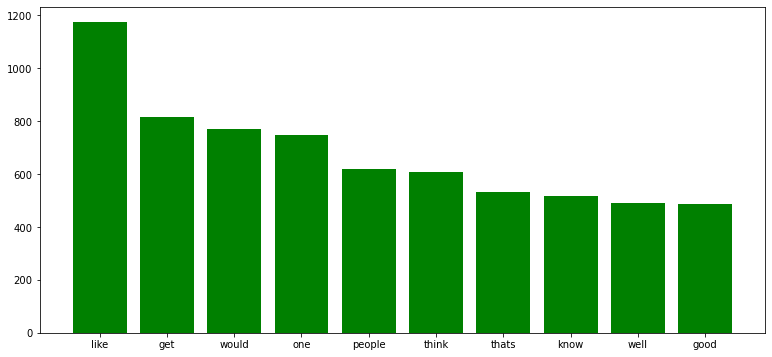

In [53]:
# Gráfico das palavras que aparecem com mais frequência na classe 0
q2 = df[zero]
q2 = q2.comment.explode().to_frame()
P2=' '.join([str(w) for w in q2['comment']])
P2 = preprocess(P2)
P2 = FreqDist(word_tokenize(P2))

figure(figsize=(13, 6))
x, y = zip(*P2.most_common(n=10))
plt.bar(range(len(x)), y, color='green')
plt.xticks(range(len(x)), x)
plt.show()

### 4° Gráfico

Na figura a seguir, podemos ver um gráfico da quantidade de comentários que foram coletados para esse conjunto de dados em cada data(mês/ano). É possível perceber que em todas as datas, a quantidade de comentários sarcásticos coletados sempre foi maior, e em dezembro de 2016 foi coletada a maior quantidade de amostras. Nesse caso é importante observar a data das amostras, pois o contexto da época acaba influênciando nos comentários, e isso ajuda a identificar o que pode ser sarcástico ou não.

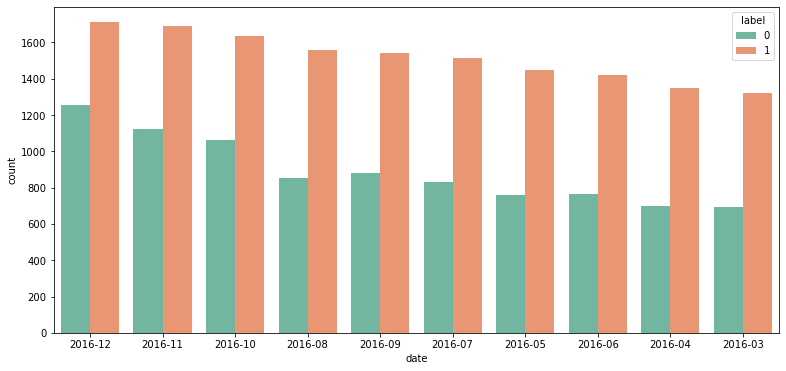

In [54]:
q = df[um]
q = q.date.explode().to_frame().reset_index(drop=True)
P3=' '.join([str(w) for w in q['date']])
P3 = FreqDist(word_tokenize(P3))
c1 = P3.most_common(n=10)
dd = pd.DataFrame(c1, columns = ['date', 'count'])

q2 = df[zero]
q2 = q2.date.explode().to_frame()
P4=' '.join([str(w) for w in q2['date']])
P4 = FreqDist(word_tokenize(P4))
c2 = P4.most_common(n=10)
dd2 = pd.DataFrame(c2, columns = ['date', 'count'])

dd['label'] = 1
dd2['label'] = 0

dd3 = pd.concat([dd, dd2], axis=0)
ax = sns.barplot(x="date", y="count", hue="label", palette="Set2", data=dd3)
plt.gcf().set_size_inches(13, 6)

### 5° Gráfico

No último gráfico, podemos observar uma comparação entre a distribuição da quantidade de caracteres dos comentários das duas classes.

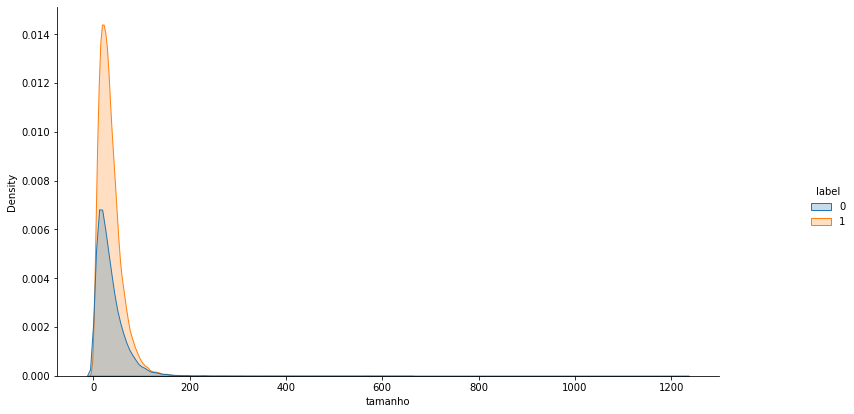

In [55]:
df['comment'] = df['comment'].astype('str')
lista = []
for i in df['comment']:
    f = preprocess(i)
    lista.append(f)
    
dc = pd.DataFrame (lista, columns = ['comment'])
label = df['label']
df_dc = pd.concat([dc, label], axis=1)
df_dc['tamanho']= dc['comment'].apply(len)
sns.displot(df_dc, x="tamanho", hue="label", kind="kde", fill=True)
plt.gcf().set_size_inches(13, 6)

### Gráficos extras

Os dois gráficos a seguir mostram os 10 bigramas mais frequentes em cada classe. É possível perceber uma grande variação entre os dois gráficos, mostrando que certas junções de palavras são muito mais utilizados em frases sarcásticas, como por exemplo "sound like", que embora apareça tanto em palavras sarcasticas quanto não sarcasticas, é predominantemente usado em contexto sarcástico.

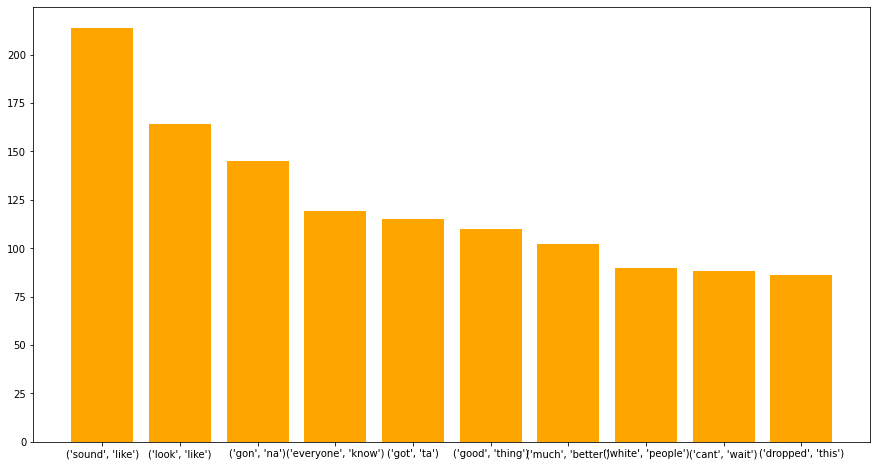

In [56]:
# Gráfico dos bigramas que aparecem com mais frequência na classe 1
from nltk import bigrams
q = df[um]
q = q.comment.explode().to_frame().reset_index(drop=True)
P=' '.join([str(w) for w in q['comment']])
P = preprocess(P)
P = word_tokenize(P)
P = list(bigrams(P))
P = FreqDist(P)

figure(figsize=(15, 8))
x, y = zip(*P.most_common(n=10))
plt.bar(range(len(x)), y, color='orange')
plt.xticks(range(len(x)), x)
plt.show()

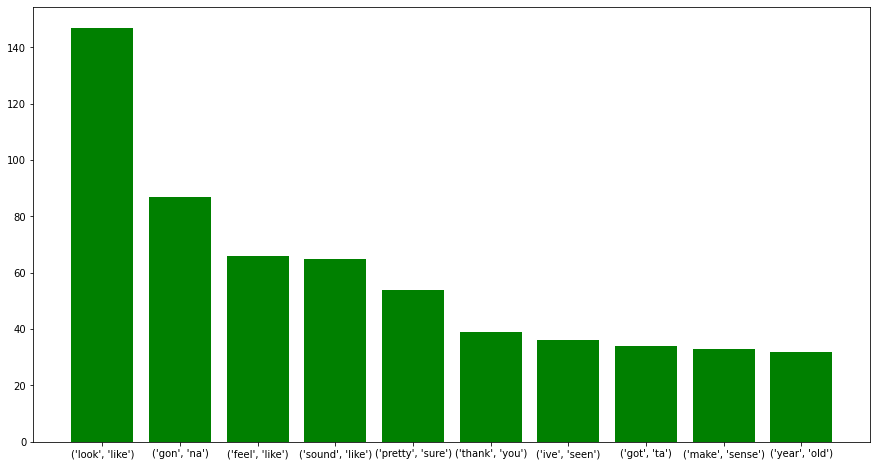

In [57]:
# Gráfico dos bigramas que aparecem com mais frequência na classe 0
q2 = df[zero]
q2 = q2.comment.explode().to_frame()
P2=' '.join([str(w) for w in q2['comment']])
P2 = preprocess(P2)
P2 = word_tokenize(P2)
P2 = list(bigrams(P2))
P2 = FreqDist(P2)

figure(figsize=(15, 8))
x, y = zip(*P2.most_common(n=10))
plt.bar(range(len(x)), y, color='green')
plt.xticks(range(len(x)), x)
plt.show()

## Aprendizado Não-Supervisionado

Nesta etapa, utilizarei uma tecnica chamada "Topic modelling", que se trata de um método não-supervisionado para agrupar documentos em um determinado número de tópicos, de forma que cada documento pode pertencer a mais de um tópico.

Para aplicar essa técnica, utilizarei o  método Latent Dirichlet Allocation(LDA), que é a tecnica mais popular utilizada para realizar Topic modelling. O LDA tenta encontrar os tópicos nos quais um documento pertence por meio das palavras que ele possui, segue a baixo um breve exemplo de como isso funciona.

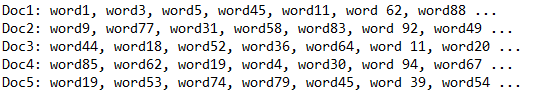

Na imagem acima temos 5 documentos, cada um contendo uma determinada quantidade de palavras que estão listadas por ordem de frequência no documento. Então ao realizarmos a aplicação do LDA:
1. primeiramente ele associa cada uma dessas palavras a um tópico aleatório.
2. Para cada documento d, percorre-se cada palavra e realiza-se as seguintes probabilidades:
        p(topic t | document d): Proporção de palavras no documento d que estão relacionadas ao tópico t.
        p(word w| topic t): Proporção de relações ao tópico t em todos os documentos que vem da palavra w. Tenta perceber  quantos documentos estão no tópico t graças a palavra w.
3. Define a probabilidade da palavra w pertencer ao tópico t como:
        p(word w with topic t) = p(topic t | document d) * p(word w | topic t)
No fim, cada palavra é associada com uma probabilidade de pertencer a cada tópico, conforme pode-se ver na tabela ilustrativa a baixo.

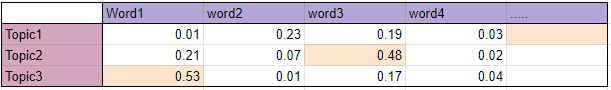

Para realizar a aplicação do LDA, primeiramente fiz o pré-processamento e a vetorização dos dados que seriam utilizados.

In [117]:
X = df['comment']

In [118]:
lista = []
for i in X:
    f = preprocess(i)
    lista.append(f)
X_PP = pd.DataFrame (lista, columns = ['comment'])

In [119]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(strip_accents='unicode', stop_words='english')
X_tf = tf.fit_transform(X_PP['comment'])

Na etapa a baixo executei o modelo LDA, defini quantidade de tópicos para 2 e o método de aprendizado para "online", pois esse metodo lida melhor com grandes quantidades de dados.

In [120]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=2, learning_method='online',random_state=42,max_iter=2)
X_tf_lda = lda.fit_transform(X_tf)

Logo abaixo, trouxe uma lista com a porcentagem de palavras pertencentes a cada tópico no documento. Me baseei nessas probabilidades para escolher a quantidade de tópicos, pois com 2 tópicos consegui perceber que em geral os documentos eram classificados com uma boa margem de diferença na porcentagem de cada tópico, ou seja, ele tem mais chances de estar no tópico correto.

In [121]:
for j in range(10):
    print(f"Documento {j}: ")
    for i,topic in enumerate(X_tf_lda[j]):
        print("Topico ",i,": ",topic*100,"%")
    print("\n")

Documento 0: 
Topico  0 :  79.28999477934188 %
Topico  1 :  20.710005220658118 %


Documento 1: 
Topico  0 :  42.7121238466532 %
Topico  1 :  57.28787615334681 %


Documento 2: 
Topico  0 :  21.245053051907277 %
Topico  1 :  78.75494694809272 %


Documento 3: 
Topico  0 :  47.35906052828882 %
Topico  1 :  52.64093947171118 %


Documento 4: 
Topico  0 :  46.50081818480665 %
Topico  1 :  53.49918181519337 %


Documento 5: 
Topico  0 :  84.27536359287721 %
Topico  1 :  15.724636407122771 %


Documento 6: 
Topico  0 :  36.28417575610276 %
Topico  1 :  63.71582424389723 %


Documento 7: 
Topico  0 :  36.67879338726414 %
Topico  1 :  63.32120661273587 %


Documento 8: 
Topico  0 :  75.95966660581513 %
Topico  1 :  24.04033339418488 %


Documento 9: 
Topico  0 :  49.941776050564464 %
Topico  1 :  50.05822394943553 %




Então, imprimi na tela algumas palavras que estão contidas nos tópicos que foram criados para que possam ser analisados.

No tópico 1, aparentemente temos palavras que são comumente utilizadas em mensagens casuais dentro da rede social Reddit, como por exemplo a palavra "thanks", que é uma forma informal de falar "thank you".

No tópico 2, temos palavras que normalmente são utilizadas em um contexto mais formal, podemos observar que diferente do tópico 1 nesse tópico não podemos ver nenhum palavrão.


In [122]:
vocab = tf.get_feature_names()
for i, comp in enumerate(lda.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:25]
    print("Tópico "+str(i+1)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print('\n')

Tópico 1: 
good yes yeah game like thanks time think make people fuck forgot shit probably man bad said point new come actually let need going theyre 

Tópico 2: 
like thats right know look really sure got lol say mean guy better thing year work love people pretty thought great maybe day want nice 



## Modelo Baseline

Visando a simplicidade, que é o intuito do modelo Baseline, optei por utilizar apenas o atributo "comment".

In [58]:
X = df['comment']
y = df['label']

Nesta etapa foi realizada a chamada da função "preprocess" para realizar o pré-processamento dos dados. Isso foi feito por meio uma estrutura de repetição que iterou entre todas as palavras do atributo escolhido.

In [59]:
lista = []
for i in X:
    f = preprocess(i)
    lista.append(f)
X_PP = pd.DataFrame (lista, columns = ['comment'])

Realizei a separação do conjunto de dados em dois diferentes conjuntos, o conjunto de treino e o conjunto de teste. Por se tratar de um baseline, o uso de um conjunto de validação não foi necessário.

In [60]:
from sklearn.model_selection import train_test_split
X_train_valid, X_test, y_train_valid, y_testB = train_test_split(X_PP,y, test_size=0.2, random_state=42, stratify=y)

Por se tratar de um dataset muito grande, e formado por diversos comentários feitos em uma rede social, é de se imaginar que existam muitas palavras que se repetem muitas vezes e que não agregam muitas informações para a análise, como possível gírias e "memes". Pensando nisso, optei por utilizar o método de vetorização TF-IDF que coloca as palavras do conjunto de dados em uma escala, penalizando as que se repetem muitas vezes durante os documentos.

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(strip_accents='unicode', stop_words='english', ngram_range=(1,2))
X_tf = tf.fit_transform(X_train_valid['comment'])
X_test_tf = tf.transform(X_test['comment'])

Logo a baixo pode-se observar uma amostra de 100 palavras que estão contidas no conjunto de dados após todos os procedimentos anteriores. Importante falar que o "TfidfVectorizer" por padrão já realiza algumas etapas de pré-processamento, porém, ele possui algumas falhas nesse aspecto, por exemplo, a remoçao de potuação não eliminou os " _ ". Com isso em mente, antes de realizar a vetorização já realizei meu próprio pré-processamento para evitar dados desnecessários.

In [62]:
c=0
for i in tf.get_feature_names():
    print(i)
    c+=1
    if c == 100:
        break

aaa
aaa game
aaa ideology
aaa platformers
aaa surprised
aaa tpp
aaaaa
aaaaa battery
aaaaaaaaand
aaaaaaaaand shit
aaaaaaaagaaaaaaaaaaaaaaaaaaiiiiiiiiiiiiin
aaaaaaaagaaaaaaaaaaaaaaaaaaiiiiiiiiiiiiin mah
aaaaaaaany
aaaaaaaany social
aaaaaaamnnnnnnnddddd
aaaaaaamnnnnnnnddddd gone
aaaaaaand
aaaaaaand fined
aaaaaand
aaaaaand thats
aaaaaannnddd
aaaaaannnddd want
aaaaall
aaaaand
aaaaand ksp
aaaand
aaaand looking
aaand
aaand retagged
aaargh
aaargh preconceived
aahahahaha
aahahahaha idea
aajkal
aampm
aampm going
aampm like
aampm overtime
aampm prairie
aampm sure
aampm year
aan
aan die
aan hand
aan het
aan vraag
aang
aang katara
aangereden
aangereden het
aap
aap follow
aap nay
aap place
aap wonder
aar
aar cuda
aaron
aaron curry
aaron diaz
aaron hernandez
aaron lmao
aaron rodgers
aav
aav mil
abaddon
abaddon fall
abandon
abandon account
abandon campaign
abandon lane
abandon ship
abandoned
abandoned father
abandoned hunt
abandoned long
abandoned rise
abandoned wife
abathur
abathur eggless
abbas
abba

Como modelo de classificação, optei pela Regressão logistica, é um modelo probabilístico e que já foi visto durante a mentoria. Sua escolha se deu por ser um algoritmo simples e que é amplamente usado em problemas de classificação binária e em classificação de textos.

In [63]:
from sklearn.linear_model import LogisticRegression
LRB = LogisticRegression()
LRB.fit(X_tf, y_train_valid)

LogisticRegression()

In [64]:
y_predictB = LRB.predict(X_test_tf)

A métrica escolhida para avaliar o modelo foi o F1 Score, essa métrica se trata de uma média harmônica entre duas outras métricas:

1. Precisão: Das predições positivas, quantas são realmente positivas?
2. Recall: De todos os verdadeiros positivos, quantos foram corretamente preditos?

Normalmente existe uma certa inversão entre essas duas métricas, ao aumentar uma delas a outra tem grande tendencia de diminuir e é nesse caso que o F1 Score brilha, pois ele tende a encontrar um meio termo entre essas duas métricas, que é um caso ideal.

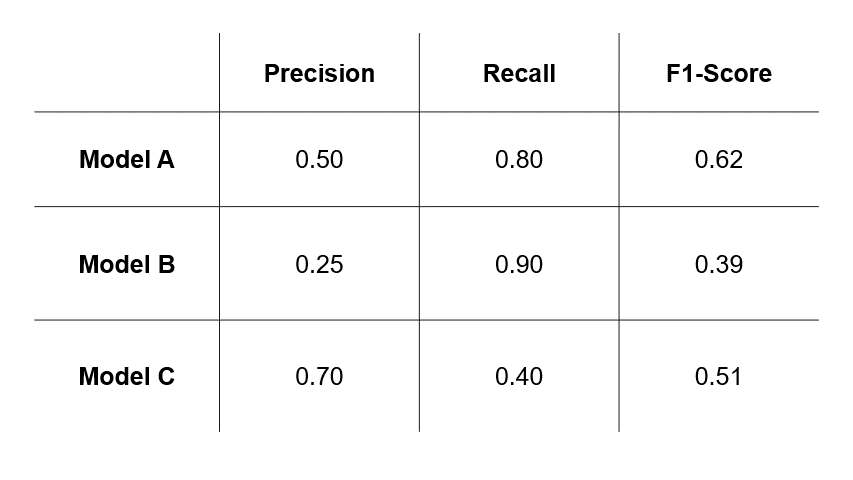

Analisando a tabela acima, podemos perceber que:

        No modelo A, 50% das predições positivas são realmente positivos, e de todos os dados classificados como verdadeiros positivos 80% deles foram corretamente preditos, esse modelo chegou a um meio termo e foi o melhor modelo desse gráfico pois apresentou o maior F1 Score
    
        No modelo B, apenas 25% das das predições positivas são realmente positivas, ou seja, esse modelo apresentou um grande número de falsos positivos e de todos os verdadeiros positivos 90% foram classificados corretamente, mostrando que esse modelo considerou quase todos os dados como positivos, e isso não é desejado em um modelo de classificação.
    
        No modelo C, 70% das predições positivas são realmente positivas, porém apenas 40% dos verdadeiros positivos foram corretamente preditos, ou seja, esse modelo apresentou um número consideravel de falsos negativos, e esse cenário também não é ideal.

In [65]:
from sklearn.metrics import f1_score
AB = f1_score(y_testB, y_predictB, average='macro')
ABB = f1_score(y_testB, y_predictB)
ABC = f1_score(y_testB, y_predictB, pos_label=0)

print(f'O F1_Score da classe 1 foi de: {round(ABB*100, 2)}%')
print(f'O F1_Score da classe 0 foi de: {round(ABC*100, 2)}%')
print(f'O F1_Score médio foi de: {round(AB*100, 2)}%')

O F1_Score da classe 1 foi de: 79.58%
O F1_Score da classe 0 foi de: 29.64%
O F1_Score médio foi de: 54.61%


Como pode ser visto acima, o F1 Score médio entre as duas classes do problema foi de 54.66% no nosso Baseline, esse valor irá servir de base para fazermos comparação com os modelos otimizados.

## 1° Conjunto de atributos de entrada

No 1° conjunto de atributos, escolhi utilizar o atributo "parent_comment" junto do "comment", pois imaginei que o contexto do comentário poderia ajudar em sua classificação.

In [66]:
X1 = df[['comment', 'parent_comment']]
y = df['label']

Primeiramente, concatenei as duas colunas escolhidas na coluna "conc" para q fosse possível utilizar as duas na vetorização.

In [67]:
X1['conc'] = X1[['comment', 'parent_comment']].agg(' '.join, axis=1)
X1

,comment,parent_comment,conc
0,"Of course, just like 3.2 was the true Messiah.","Is patch 3.3 going to be our savior? Without trying to sound like a broken record and repeating the many point of views of the growing apocalyptic threads on this forum. I was hoping to get the opinions of everyone if they believe patch 3.3 is going to bring back some of the players who have quit in the last patch or two, or does this feel like another cookie cutter patch that wont stop exit of quality population specifically on the North American servers. I ask this in concern that I have made a assertive effort as of late to refill our FC, and one of the strong points of the patch info so far is that they are installing a cross realm raid tool, which seems like it would diminish the need to recruit for a FC. I personally enjoy the aspect of a 10-15 member FC which can grow close and share things in common to the game and outside the game. But with the game seemingly losing subs it has become harder to find people to come together like I had just described and I don't want to put false hope in those who I have recruited so far. Give me some hope!","Of course, just like 3.2 was the true Messiah. Is patch 3.3 going to be our savior? Without trying to sound like a broken record and repeating the many point of views of the growing apocalyptic threads on this forum. I was hoping to get the opinions of everyone if they believe patch 3.3 is going to bring back some of the players who have quit in the last patch or two, or does this feel like another cookie cutter patch that wont stop exit of quality population specifically on the North American servers. I ask this in concern that I have made a assertive effort as of late to refill our FC, and one of the strong points of the patch info so far is that they are installing a cross realm raid tool, which seems like it would diminish the need to recruit for a FC. I personally enjoy the aspect of a 10-15 member FC which can grow close and share things in common to the game and outside the game. But with the game seemingly losing subs it has become harder to find people to come together like I had just described and I don't want to put false hope in those who I have recruited so far. Give me some hope!"
1,"Yeah because Iran was 100% muslim prior to 1979, and still is now.",I suggest you research Iran pre-1979 as well as al-Qatb and the rise of Wahhabism. You are fully entitled to have an opinion and express it (and you do bring up a good point re: rural cobservatism) but you are misinformed.,"Yeah because Iran was 100% muslim prior to 1979, and still is now. I suggest you research Iran pre-1979 as well as al-Qatb and the rise of Wahhabism. You are fully entitled to have an opinion and express it (and you do bring up a good point re: rural cobservatism) but you are misinformed."
2,WELL YOU'RE JUST A BITCH...YOU HAVE TO GO AND POST AND TAKE YOUR DOWNVOTES,"Warriors / Clips game threads literally add zero value to the game experience. Why would I want to see the words flop, flopped and flopper repeated constantly? Thunder / Clips game threads were pretty good during the season. We'll see how the playoff ones are.","WELL YOU'RE JUST A BITCH...YOU HAVE TO GO AND POST AND TAKE YOUR DOWNVOTES Warriors / Clips game threads literally add zero value to the game experience. Why would I want to see the words flop, flopped and flopper repeated constantly? Thunder / Clips game threads were pretty good during the season. We'll see how the playoff ones are."
3,"Yeah, it's dumb to run background checks on potential teachers.","Oh i forgot.., you get to be finger printed when you are hired! Awesome!","Yeah, it's dumb to run background checks on potential teachers. Oh i forgot.., you get to be finger printed when you are hired! Awesome!"
4,"Oh, it's not that bad once you get a handle on the crippling depression and constant tooth grinding.",Haha oh. Definitely not an option than.,"Oh, it's not that bad once you get a handle on th

Realizei os mesmos processos de pré-processamento, separação em conjunto de treino e teste, balanceamento das classes e vetorização já comentados durante o baseline.

In [68]:
lista = []
for i in X1['conc']:
    f = preprocess(i)
    lista.append(f)
X1_PP = pd.DataFrame (lista, columns = ['conc'])

Em todos os modelos foram utilizados GridSearch ou RandomSearch, que já realizam a separação em conjunto de treino e validação, sendo assim, nessa etapa novamente fiz apenas a separação entre treino e teste.

In [69]:
X_train_valid, X_test, y_train_valid, y_test = train_test_split(X1_PP,y, test_size=0.2, random_state=42, stratify=y)

Utilizei o método "Random Over-Sampling" para realizar o balanceamento das classes, esse método duplica aleatoriamente amostras na classe que possui menos elementos, até que ambas as classes tenham o mesmo tamanho. Optei por utilizar o Over-Sampling pois a tecnica de Under-Sampling pode acabar fazendo com que o conjunto perca algumas informações importantes, e ao fazer testes com este método pude perceber que ele reduziu bastante o F1 Score do modelo em questão.

In [70]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_r, y_r = ros.fit_resample(X_train_valid, y_train_valid)

Durante a vetorização, defini para esse conjunto de atributos que gostaria de trabalhar com unigramas e bigramas, para isso alterei o parâmetro "ngram_range" para (1,2). Também defini o parâmetro "min_df" como 2, para ignorar palavras que aparecem em menos de dois documentos.

In [71]:
tf = TfidfVectorizer(strip_accents='unicode', stop_words='english', ngram_range=(1,2), min_df=2)
X_tf = tf.fit_transform(X_r['conc'])
X_test_tf = tf.transform(X_test['conc'])

Novamente, imprimi 100 palavras que estão contidas no vocabulário dos dados, pode-se perceber que o min_df causou uma grande redução na quantidade de palavras sem sentido, mas muitas ainda continuaram. Esse problema poderia ser resolvido aumentando o valor do min_df, mas isso poderia causar uma grande perda de informações.

In [72]:
c=0
for i in tf.get_feature_names():
    print(i)
    c+=1
    if c == 100:
        break

aaa
aaa game
aaa surprised
aaaaa
aaaaa battery
aaaaaaamnnnnnnnddddd
aaaaaaamnnnnnnnddddd gone
aaaaaaand
aaaaand
aaaand
aaaand looking
aaand
aaand retagged
aac
aac rest
aahahahahahah
aahahahahahah cuck
aampm
aampm year
aan
aan hand
aan het
aan wat
aang
aang katara
aap
aap wonder
aar
aar cuda
aaron
aaron hernandez
aaron lennon
aaron lmao
aaron poochigian
aaron rodgers
aaron smith
aaron taylorjohnson
aatrox
aatrox immune
aav
aback
abandon
abandon campaign
abandon character
abandon plan
abandon ship
abandoned
abandoned girlfriend
abandoned house
abandoned irradiated
abandoned plantation
abandoned rise
abandoned theme
abandonment
abathur
abbas
abbas israeli
abbas restore
abbas say
abbot
abbotsford
abbotsford nice
abbott
abbreviating
abbreviating long
abbreviation
abbreviation tech
abc
abc news
abc voter
abcdefghijklmnopqrstuvwxyz
abd
abd look
abdomenthe
abdomenthe way
abdominal
abdominal menstrual
abdullah
abdullah bryant
abe
abe splyce
abedins
abedins shoulder
abelson
abelson day
abet
abh


### 1° Modelo: Regressão logística

Novamente volto a utilizar a regressão logística, dessa vez esse modelo será otimizado para que possa ser comparado com o modelo baseline.

Para otimização dos hiperparâmetros foi utilizada a técnica "GridSearch", basicamente o modelo irá testar todas as combinações de hiperparâmetros que estão contidas no dicionário fornecido e escolher a que proporcionar um melhor F1 Score.

Os hiperparâmetros otimizados foram:
1. C: Inverso da força de regularização, quanto menor o seu valor, maior a força de regularização.
2. Penalty: Tecnica de regularização que será utilizada.
3. Solver: Algoritmo que será utilizado para o problema da otimização.

In [73]:
from sklearn.model_selection import GridSearchCV

parametersRL = {'C':[1.0, 0.5, 1.5, 2.0],
              'penalty': ['l2', 'none'],
              'solver':['lbfgs', 'saga', 'newton-cg']}

In [74]:
LRB = LogisticRegression()
GLRB = GridSearchCV(LRB, param_grid=parametersRL, refit='f1_macro', return_train_score=False, scoring= 'f1_macro')
GLRB.fit(X_tf, y_r)
GLRB.best_estimator_

LogisticRegression(penalty='none')

In [75]:
y_predict11 = GLRB.predict(X_test_tf)
A11 = f1_score(y_test, y_predict11, average='macro')
A11B = f1_score(y_test, y_predict11)
A11C = f1_score(y_test, y_predict11, pos_label=0)

print(f'O F1_Score da classe 1 foi de: {round(A11B*100, 2)}%')
print(f'O F1_Score da classe 0 foi de: {round(A11C*100, 2)}%')
print(f'O F1_Score médio foi de: {round(A11*100, 2)}%')

O F1_Score da classe 1 foi de: 75.18%
O F1_Score da classe 0 foi de: 35.68%
O F1_Score médio foi de: 55.43%


Esse modelo apresentou F1 Score médio de 55.25%, levemente superior ao obtido no baseline. Pode-se perceber que esse modelo mesmo tendo um resultado razoavelmente bom, o F1 Score na classe 0 não foi muito satisfatório, sendo esse um padrão nesse dataset, como poderemos perceber ao comparar com os modelos que veremos futuramente.

### 2° Modelo: Naive bayes

O segundo modelo escolhido foi o Naive Bayes, ele também é um classificador probabilístico e foi baseado no "Teorema de Bayes".
Esse algoritmo é muito popular em NLP graças a sua simplicidade e rapidez, além disso,  ele costuma apresentar um desempenho melhor do que muitos outros classificadores. 

Esse modelo também foi otimizado utilizando GridSearch, os hiperparâmetros otimizados foram:
1. Alpha: É o "Smoothing parameter" utilizado na equação "Laplace Smoothing" para resolver o problema da probabilidade zero no algoritmo Naive Bayes
2. Fit_prior: Define se o algoritmo deve aprender a "Prior probability"(probabilidade de um evento ocorrer antes de novos dados serem coletados) dos dados.

In [76]:
parametersNB = {'alpha':[1.0, 0.5, 1.5],
              'fit_prior': [True, False]}

In [77]:
from sklearn.naive_bayes import MultinomialNB
NB = MultinomialNB()
GNB = GridSearchCV(NB, param_grid=parametersNB, refit='f1_macro', scoring= 'f1_macro')
GNB.fit(X_tf, y_r)
GNB.best_estimator_

MultinomialNB(alpha=0.5)

In [78]:
y_predict12 = GNB.predict(X_test_tf)
A12B = f1_score(y_test, y_predict12)
A12C = f1_score(y_test, y_predict12, pos_label=0)
A12 = f1_score(y_test, y_predict12, average='macro')

print(f'O F1_Score da classe 1 foi de: {round(A12B*100, 2)}%')
print(f'O F1_Score da classe 0 foi de: {round(A12C*100, 2)}%')
print(f'O F1_Score médio foi de: {round(A12*100, 2)}%')

O F1_Score da classe 1 foi de: 79.72%
O F1_Score da classe 0 foi de: 12.84%
O F1_Score médio foi de: 46.28%


Nesse modelo tivemos um F1 Score médio de 46.27%, valor muito inferior ao do baseline mostrando que esse modelo não se adaptou bem com o conjunto de dados, mais para frente farei um novo modelo utilizando o algoritmo Naive bayes para tentar compreender melhor o que causou essa perda.

### 3° Modelo: SVM

O terceiro modelo escolhido foi o SVM, ele é um algoritmo de classificação supervisionado e que classifica os dados por meio de hiperplanos.

Neste modelo, a maioria dos hiperparâmetros que seriam otimizados se tratavam de números, sendo assim, imaginei que a otimização por meio do método RandomSearch, que diferente do GridSearch que percorre todas as possibilidades, essa tecnica testa valores aleatória a cada iteração, por padrão ela realiza 10 iterações.
Os hiperparâmetros otimizados foram:
1. C: Inverso da força de regularização, quanto menor o seu valor, maior a força de regularização.
2. Kernel: Define qual kernel vai ser utilizado, nesse caso, entre o "rbf" e o "poly"
3. degree: Escolhe o grau da função polinomial, é ignorado a não ser que o kernel "poly" seja escolhido.

In [79]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
import random
parametersS = dict(
    C= [random.uniform(1, 2)],
    kernel= ['rbf', 'poly'],
    degree= [sp_randint.rvs(2,5)],
)

In [80]:
from sklearn.svm import SVC
S = SVC(max_iter=3500)
RS = RandomizedSearchCV(S, parametersS, random_state=42, return_train_score=False, scoring= 'f1_macro')
RS.fit(X_tf, y_r)
RS.best_estimator_

SVC(C=1.2944501805784014, degree=2, kernel='poly', max_iter=3500)

In [81]:
y_predict13 = RS.predict(X_test_tf)
A13 = f1_score(y_test, y_predict13, average='macro')
A13B = f1_score(y_test, y_predict13)
A13C = f1_score(y_test, y_predict13, pos_label=0)

print(f'O F1_Score da classe 1 foi de: {round(A13B*100, 2)}%')
print(f'O F1_Score da classe 0 foi de: {round(A13C*100, 2)}%')
print(f'O F1_Score médio foi de: {round(A13*100, 2)}%')

O F1_Score da classe 1 foi de: 69.94%
O F1_Score da classe 0 foi de: 39.04%
O F1_Score médio foi de: 54.49%


Esse modelo apresentou um F1 Score médio de 54.07%, também obteve um valor mediano mas quando comparado os F1 Score das classes separadamente, pode-se perceber que ele conseguiu fazer ume melhor destinção entre as duas classes quando comparado com os modelos anteriores.

### 4° Modelo: Passive-Agressive

O 4° modelo escolhido foi o "Passive-Agressive", é um classificador que não foi visto durante a mentoria, e é um dos poucos "Online-learning algorithms". Em algoritmos de aprendizado online, o conjunto de dados é separado em diversas amostras, que são sequencialmente atualizadas no classificador, de forma resumida pode-se dizer que o modelo pega um exemplo de treino, atualiza o classificador, e logo após descarta o exemplo. O algoritmo "Passive-Agressive" possui esse nome pois ele possui duas possibilidades:

1. Passive: A predição da amostra está correta, então não é feita nenhuma alteração no modelo.
2. Agressive: A predição da amostra está incorreta, são feitas alterações no modelo para corrigir o erro.

Esse modelo foi escolhido pois ele é muito utilizado para situações em que existem uma grande quantidade de dados, como é o caso do dataset SARC, que está sendo trabalhado nesse notebook.

A otimização desse modelo também foi realizada pelo método RandomSearch, e os dados otimizados foram:
1. C: Inverso da força de regularização, quanto menor o seu valor, maior a força de regularização.
2. tol: Critério de parada, define que o modelo irá parar quando chegar a um determinado resultado.
3. max_iter: Quantidade de iterações que o modelo realizará nos dados de treino.

In [82]:
from scipy.stats import uniform
parametersPA = dict(
    C= [random.uniform(1, 2)],
    tol= [10**uniform.rvs(loc = -5, scale = 4)],
    max_iter= [sp_randint.rvs(1000, 2000,5)],
)

In [83]:
from sklearn.linear_model import PassiveAggressiveClassifier
PA = PassiveAggressiveClassifier()
RPA = RandomizedSearchCV(PA, parametersPA, random_state=42, return_train_score=False, scoring= 'f1_macro')
RPA.fit(X_tf, y_r)
RPA.best_estimator_

PassiveAggressiveClassifier(C=1.4748876473789796, max_iter=1836,
                            tol=1.8668832086830175e-05)

In [84]:
y_predict14 = RPA.predict(X_test_tf)
A14 = f1_score(y_test, y_predict14, average='macro')
A14B = f1_score(y_test, y_predict14)
A14C = f1_score(y_test, y_predict14, pos_label=0)

print(f'O F1_Score da classe 1 foi de: {round(A14B*100, 2)}%')
print(f'O F1_Score da classe 0 foi de: {round(A14C*100, 2)}%')
print(f'O F1_Score médio foi de: {round(A14*100, 2)}%')

O F1_Score da classe 1 foi de: 74.95%
O F1_Score da classe 0 foi de: 36.08%
O F1_Score médio foi de: 55.52%


O Passive-Agressive conseguiu um valor muito bom em seu F1 Score médio, sendo o modelo balanceado que obteve os melhores resultados no primeiro conjunto.

### 5° Modelo: Naive Bayes (Sem balanceamento)

Para fim, fiz um teste com o modelo Naive bayes sem realizar o balanceamento com o intuito de descobrir a causa daquele baixo F1 Score obtido anteriormente.

In [85]:
tf = TfidfVectorizer(strip_accents='unicode', stop_words='english', ngram_range=(1,2), min_df=2)
X_tf2 = tf.fit_transform(X_train_valid['conc'])
X_test_tf2 = tf.transform(X_test['conc'])

In [86]:
parametersNB = {'alpha':[1.0, 0.5, 1.5],
              'fit_prior': [True, False]}

In [87]:
from sklearn.naive_bayes import MultinomialNB
NB = MultinomialNB()
GNBS = GridSearchCV(NB, param_grid=parametersNB, refit='f1_macro', scoring= 'f1_macro')
GNBS.fit(X_tf2, y_train_valid)
GNBS.best_estimator_

MultinomialNB(alpha=0.5, fit_prior=False)

In [88]:
y_predict15 = GNBS.predict(X_test_tf2)
A15 = f1_score(y_test, y_predict15, average='macro')
A15B = f1_score(y_test, y_predict15)
A15C = f1_score(y_test, y_predict15, pos_label=0)

print(f'O F1_Score da classe 1 foi de: {round(A15B*100, 2)}%')
print(f'O F1_Score da classe 0 foi de: {round(A15C*100, 2)}%')
print(f'O F1_Score médio foi de: {round(A15*100, 2)}%')

O F1_Score da classe 1 foi de: 76.13%
O F1_Score da classe 0 foi de: 38.85%
O F1_Score médio foi de: 57.49%


Como pode-se ver ouve um grande aumento no F1 Score desse modelo sem o balanceamento, mostrando que a causa do F1 Score baixo desse modelo anteriormente realmente se deu pois ele não conseguiu lidar muito bem com os dados balanceados.

## 2° Conjunto de atributos de entrada

Para o 2° conjunto, decidi utilizar os mesmos atributos do 1° conjunto, porém, dessa vez utilizando o método de vetorização "Bag of Words". A escolha de manter os mesmos atributos se deu pois possibilitaria uma melhor comparação entre os dois métodos.

In [89]:
from sklearn.feature_extraction.text import CountVectorizer
bw = CountVectorizer(strip_accents='unicode', stop_words='english', ngram_range=(1,2), min_df=2)
X_bw = bw.fit_transform(X_r['conc'])
X_test_bw = bw.transform(X_test['conc'])

Nos modelos a seguir também optei por manter os mesmos hiperparâmetros que foram utilizados na otimização dos modelos do 1° conjunto, com o intuito de possibilitar uma comparação mais justa entre ambos.

### 1° Modelo: Regressão logística

In [90]:
parametersRL = {'C':[1.0, 0.5, 1.5, 2.0],
              'penalty': ['l2', 'none'],
              'solver':['lbfgs', 'saga', 'newton-cg']}

In [91]:
LRB = LogisticRegression()
GLRB2 = GridSearchCV(LRB, param_grid=parametersRL, refit='f1_macro', return_train_score=False, scoring= 'f1_macro')
GLRB2.fit(X_bw, y_r)
GLRB2.best_estimator_

LogisticRegression(C=2.0)

In [92]:
y_predict21 = GLRB2.predict(X_test_bw)
A21 = f1_score(y_test, y_predict21, average= 'weighted')
A21B = f1_score(y_test, y_predict21)
A21C = f1_score(y_test, y_predict21, pos_label=0)

print(f'O F1_Score da classe 1 foi de: {round(A21B*100, 2)}%')
print(f'O F1_Score da classe 0 foi de: {round(A21C*100, 2)}%')
print(f'O F1_Score médio foi de: {round(A21*100, 2)}%')

O F1_Score da classe 1 foi de: 76.53%
O F1_Score da classe 0 foi de: 36.67%
O F1_Score médio foi de: 63.24%


O modelo de regressão logística apresentou um resultado muito superior ao baseline, pode-se concluir que o modelo de regressão logística se saiu melhor classificando dados vetorizados pelo "Bag of Words", pois apresentou um F1 Score consideravelmente maior e foi o modelo que apresentou os melhore resultados no geral.

### 2° Modelo: Naive bayes

In [93]:
parametersNB = {'alpha':[1.0, 0.5, 1.5],
              'fit_prior': [True, False]}

In [94]:
from sklearn.naive_bayes import MultinomialNB
NB = MultinomialNB()
GNB2 = GridSearchCV(NB, param_grid=parametersNB, refit='f1_macro', scoring= 'f1_macro')
GNB2.fit(X_bw, y_r)
GNB2.best_estimator_

MultinomialNB(alpha=0.5)

In [95]:
y_predict22 = GNB2.predict(X_test_bw)
A22 = f1_score(y_test, y_predict22, average='macro')
A22B = f1_score(y_test, y_predict22)
A22C = f1_score(y_test, y_predict22, pos_label=0)

print(f'O F1_Score da classe 1 foi de: {round(A22B*100, 2)}%')
print(f'O F1_Score da classe 0 foi de: {round(A22C*100, 2)}%')
print(f'O F1_Score médio foi de: {round(A22*100, 2)}%')

O F1_Score da classe 1 foi de: 79.39%
O F1_Score da classe 0 foi de: 15.14%
O F1_Score médio foi de: 47.26%


O modelo Naive bayes continuou com um valor bem baixo em seu F1 Score, porém apresentou uma pequena melhora em relação ao conjunto anterior.

### 3° Modelo: SVM

In [96]:
parametersS = dict(
    C= [random.uniform(1, 2)],
    kernel= ['rbf', 'poly'],
    degree= [sp_randint.rvs(2,5)],
)

In [97]:
S = SVC(max_iter=3500)
RS2 = RandomizedSearchCV(S, parametersS, random_state=42, return_train_score=False, scoring= 'f1_macro')
RS2.fit(X_bw, y_r)
RS2.best_estimator_

SVC(C=1.1451203132718146, degree=2, max_iter=3500)

In [98]:
y_predict23 = RS2.predict(X_test_bw)
A23 = f1_score(y_test, y_predict23, average='macro')
A23B = f1_score(y_test, y_predict23)
A23C = f1_score(y_test, y_predict23, pos_label=0)

print(f'O F1_Score da classe 1 foi de: {round(A23B*100, 2)}%')
print(f'O F1_Score da classe 0 foi de: {round(A23C*100, 2)}%')
print(f'O F1_Score médio foi de: {round(A23*100, 2)}%')

O F1_Score da classe 1 foi de: 79.52%
O F1_Score da classe 0 foi de: 3.84%
O F1_Score médio foi de: 41.68%


O modelo utilizando SVM foi o mais impactado com a mudança do método de vetorização, ele apresentou uma quedra brusca de mais de 10% em seu F1 Score.

### 4° Modelo: Passive-Agressive

In [99]:
parametersPA = dict(
    C= [random.uniform(1, 2)],
    tol= [10**uniform.rvs(loc = -5, scale = 4)],
    max_iter= [sp_randint.rvs(1000, 2000,5)],
)

In [100]:
PA = PassiveAggressiveClassifier()
RPA2 = RandomizedSearchCV(PA, parametersPA, random_state=42, return_train_score=False, scoring= 'f1_macro')
RPA2.fit(X_bw, y_r)
RPA2.best_estimator_

PassiveAggressiveClassifier(C=1.6763057146105524, max_iter=1738,
                            tol=0.0017344158867825348)

O modelo utilizando o método Passive-Agressive não foi muito impactado pela troca do método de vetorização, não apresentando mudança relevante em seu F1 Score

In [101]:
y_predict24 = RPA2.predict(X_test_bw)
A24 = f1_score(y_test, y_predict24, average='macro')
A24B = f1_score(y_test, y_predict24)
A24C = f1_score(y_test, y_predict24, pos_label=0)

print(f'O F1_Score da classe 1 foi de: {round(A24B*100, 2)}%')
print(f'O F1_Score da classe 0 foi de: {round(A24C*100, 2)}%')
print(f'O F1_Score médio foi de: {round(A24*100, 2)}%')

O F1_Score da classe 1 foi de: 74.1%
O F1_Score da classe 0 foi de: 37.79%
O F1_Score médio foi de: 55.94%


O Modelo Passive-Agressive deu um resultado levemente inferior ao primeiro conjunto, mas continuou sendo um modelo de destaque entre os apresentados anteriormente.

### 5° Modelo: SVM (Sem balanceamento)

No 2° conjunto refiz o mesmo teste feito com o Naive bayes, dessa vez utilizado o algoritmo SVM para investigar se ele também estava sendo afetado pelo balanceamento dos dados.

In [102]:
bw = CountVectorizer(strip_accents='unicode', stop_words='english', ngram_range=(1,2), min_df=2)
X_bw2 = bw.fit_transform(X_train_valid['conc'])
X_test_bw2 = bw.transform(X_test['conc'])

In [103]:
parametersS = dict(
    C= [random.uniform(1, 2)],
    kernel= ['rbf', 'poly'],
    degree= [sp_randint.rvs(2,5)],
)

In [104]:
S = SVC(max_iter=3500)
RSS2 = RandomizedSearchCV(S, parametersS, random_state=42, return_train_score=False, scoring= 'f1_macro')
RSS2.fit(X_bw2, y_train_valid)
RSS2.best_estimator_

SVC(C=1.2486146759692376, max_iter=3500)

In [105]:
y_predict25 = RSS2.predict(X_test_bw2)
A25 = f1_score(y_test, y_predict25, average='macro')
A25B = f1_score(y_test, y_predict25)
A25C = f1_score(y_test, y_predict25, pos_label=0)

print(f'O F1_Score da classe 1 foi de: {round(A25B*100, 2)}%')
print(f'O F1_Score da classe 0 foi de: {round(A25C*100, 2)}%')
print(f'O F1_Score médio foi de: {round(A25*100, 2)}%')

O F1_Score da classe 1 foi de: 73.41%
O F1_Score da classe 0 foi de: 25.75%
O F1_Score médio foi de: 49.58%


Novamento, o modelo sem a etapa de balanceamento apresentou uma grande melhora, mostrando que o balanceamento também foi prejudicial na classificação do SVM

## Análise de resultados

Segue a baixo um gráfico com todos os resultados obtidos, pode-se perceber que alguns modelos se saíram melhor dependendo do método de vetorização que estava sendo utilizado, também é possível notar que alguns modelos se saíram melhor sem o uso do balanceamento.

In [106]:
data = {'Conjunto': ['Baseline', '1° Conjunto', '1° Conjunto', '1° Conjunto', '1° Conjunto', '1° Conjunto', '2° Conjunto', '2° Conjunto', '2° Conjunto', '2° Conjunto', '2° Conjunto', ],
        'Modelo': ['Regressão Logística', 'Regressão Logística', 'Naive Bayes', 'SVM', 'Passive-Agressive', 'Naive Bayes(Desbalanceado)', 'Regressão Logística', 'Naive Bayes', 'SVM', 'Passive-Agressive', 'SVM(Desbalanceado)'],
        'F1_Score Médio(%)': [round(AB*100, 2), round(A11*100, 2), round(A12*100, 2), round(A13*100, 2), round(A14*100, 2), round(A15*100, 2), round(A21*100, 2), round(A22*100, 2), round(A23*100, 2), round(A24*100, 2), round(A25*100, 2)],
        'F1_Score Classe 1(%)': [round(ABB*100, 2), round(A11B*100, 2), round(A12B*100, 2), round(A13B*100, 2), round(A14B*100, 2), round(A15B*100, 2), round(A21B*100, 2), round(A22B*100, 2), round(A23B*100, 2), round(A24B*100, 2), round(A25B*100, 2)],
        'F1_Score Classe 0(%)': [round(ABC*100, 2), round(A11C*100, 2), round(A12C*100, 2), round(A13C*100, 2), round(A14C*100, 2), round(A15C*100, 2), round(A21C*100, 2), round(A22C*100, 2), round(A23C*100, 2), round(A24C*100, 2), round(A25C*100, 2)],
       }
tabela = pd.DataFrame(data)
tabela

,Conjunto,Modelo,F1_Score Médio(%),F1_Score Classe 1(%),F1_Score Classe 0(%)
0,Baseline,Regressão Logística,54.61,79.58,29.64
1,1° Conjunto,Regressão Logística,55.43,75.18,35.68
2,1° Conjunto,Naive Bayes,46.28,79.72,12.84
3,1° Conjunto,SVM,54.49,69.94,39.04
4,1° Conjunto,Passive-Agressive,55.52,74.95,36.08
5,1° Conjunto,Naive Bayes(Desbalanceado),57.49,76.13,38.85
6,2° Conjunto,Regressão Logística,63.24,76.53,36.67
7,2° Conjunto,Naive Bayes,47.26,79.39,15.14
8,2° Conjunto,SVM,41.68,79.52,3.84
9,2° Conjunto,Passive-Agressive,55.94,74.10,37.79


No geral, o modelo que apresentou o melhor resultado foi a Regressão Logística do 2° conjunto(utilizando Bag of Words), então utilizei sua predição para montar uma matriz de confusão que permitisse avaliar os erros que aconteceram durante a classificação.

### Regressão Logística - 2° Conjunto

In [107]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
CM = confusion_matrix(y_test,y_predict21, labels= GNBS.classes_)

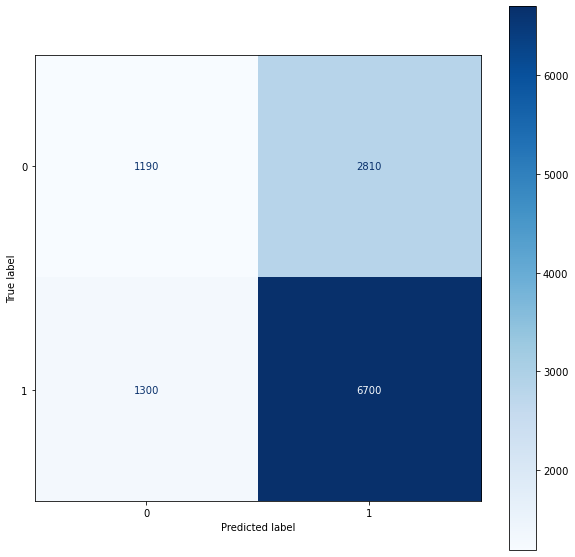

In [108]:
disp = ConfusionMatrixDisplay(confusion_matrix= CM, display_labels=GNBS.classes_)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(cmap=plt.cm.Blues, ax= ax)
plt.show()

Considerando a classe 1 como "positiva" e a classe 0 como "negativa", pode-se perceber que esse modelo fez um bom trabalho em classificar os dados da classe 1, apresentou um número satisfatorio de verdadeiros positivos, porém, ele apresentou dificuldade para classificar os dados da classe 0, pois como pode ser visto na matriz de confusão, o número de falsos positivos é maior que o dobro do de verdadeiros negativos, e essa situação explica o baixo valor que este modelo obteve no F1 Score da classe 0.

###  Comparação extra

Observei que alguns modelos otimizados não estavam apresentando melhora significante em relação ao baseline que utilizou apenas a coluna "comment" como atributo, então resolvi fazer uma comparação do meu melhor modelo com um modelo semelhante utilizando somente a coluna "comment".

In [109]:
X = df['comment']
y = df['label']

In [110]:
lista = []
for i in X:
    f = preprocess(i)
    lista.append(f)
X_PP = pd.DataFrame (lista, columns = ['comment'])

In [111]:
from sklearn.model_selection import train_test_split
X_train_valid, X_test, y_train_valid, y_testC = train_test_split(X_PP,y, test_size=0.2, random_state=42, stratify=y)

In [112]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_r, y_r = ros.fit_resample(X_train_valid, y_train_valid)

In [113]:
bw = CountVectorizer(strip_accents='unicode', stop_words='english', ngram_range=(1,2), min_df=2)
X_bw3 = bw.fit_transform(X_r['comment'])
X_test_bw3 = bw.transform(X_test['comment'])

In [114]:
LRB = LogisticRegression()
GLRB2C = GridSearchCV(LRB, param_grid=parametersRL, refit='f1_macro', return_train_score=False, scoring= 'f1_macro')
GLRB2C.fit(X_bw3, y_r)
GLRB2C.best_estimator_

LogisticRegression(C=2.0)

In [115]:
y_predictC = GLRB2C.predict(X_test_bw3)
AC = f1_score(y_testC, y_predictC, average= 'weighted')
ACB = f1_score(y_testC, y_predictC)
ACC = f1_score(y_testC, y_predictC, pos_label=0)

print(f'O F1_Score da classe 1 foi de: {round(ACB*100, 2)}%')
print(f'O F1_Score da classe 0 foi de: {round(ACC*100, 2)}%')
print(f'O F1_Score médio foi de: {round(AC*100, 2)}%')

O F1_Score da classe 1 foi de: 75.74%
O F1_Score da classe 0 foi de: 46.54%
O F1_Score médio foi de: 66.01%


Pode-se ver que o F1 Score médio da regressão logística apenas com a coluna "comment" apresentou uma melhora de quase 1%, e além disso obteve um resultado muito melhor classificando os dados da classe 0.

In [129]:
data = {'Modelo': ['Regressão Logística(2 atributos)', 'Regressão Logística(1 atributo)'],
        'F1_Score médio(%)': [round(A21*100, 2), round(AC*100, 2)],
        'F1_Score classe 1(%)': [round(A21B*100, 2), round(ACB*100, 2)],
        'F1_Score Classe 2(%)': [round(A21C*100, 2), round(ACC*100, 2)],
        }
tabela = pd.DataFrame(data)
tabela

,Modelo,F1_Score médio(%),F1_Score classe 1(%),F1_Score Classe 2(%)
0,Regressão Logística(2 atributos),63.24,76.53,36.67
1,Regressão Logística(1 atributo),66.01,75.74,46.54


### Conclusões:

Aparentemente, o uso do atributo "parent_comment" não se mostrou favorável para a classificação, uma teoria que pode explicar essa situação é a de que por a coluna "parent_comment" por possuir um número muito maior de palavras, ela acabou sendo considerada mais importante do que a coluna "comment", que é a coluna alvo para detectarmos o sarcasmo.